**Table of Content**
* Suppoet Vector Machine
    * Objective function
        * Introduction
        * Soft margin SVM
        * Hard margin SVM
        * Example 4.1
    * Non-linear SVM
        * Polynomial features
        * Example 4.2
        * Similarity features
        * Example 4.3
    * Other applications of SVM 
*  SVM with Bank Marketing dataset
    * Dealing with mixed variable types
        * Numeric variables
        * Categorical variables
            * Ordinal variables
            * Nominal variables
    * Train, test split and model selection
    * Final performance

Welcome to the fourth tutorial in the machine learning series - support vector machine (SVM)! I will start with an introduction to SVM with examples. At the end of this tutorial I will run SVM on the UCI bank marking dataset and see how my SVM model performs. This is the longest tutorial so far, but you will learn a lot, too!<br/>

For my previous tutorials, please see: <br/>
[Machine Learning 1 - Regression, Gradient Descent](https://www.kaggle.com/fengdanye/machine-learning-1-regression-gradient-descent#) <br/>
[Machine Learning 2 Regularized LM, Early Stopping](https://www.kaggle.com/fengdanye/machine-learning-2-regularized-lm-early-stopping#) <br/>
[Machine Learning 3 Logistic and Softmax Regression](https://www.kaggle.com/fengdanye/machine-learning-3-logistic-and-softmax-regression#)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [3]:
plt.rc('axes', lw = 1.5)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('xtick.major', size = 5, width = 3)
plt.rc('ytick.major', size = 5, width = 3)

In [4]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

# Support Vector Machine
## Objective function
### Introduction
Support vector machine (SVM) is one of the most popular classification techniques in machine learning. Let's introduce the objective function of SVM through the logistic regression cost function *log loss* with l2 regularization(see my [previous tutorial](https://www.kaggle.com/fengdanye/machine-learning-3-logistic-and-softmax-regression)):
<center>
$J(\theta)=\frac{1}{m}\sum^{m}_{i=1}[y^{(i)}(-log(\hat{p}^{(i)}))+(1-y^{(i)})(-log(1-\hat{p}^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$
</center>
where 
<center>
$\hat{p}^{(i)}=\sigma(\vec{\theta}^{T}\cdot \vec{x}^{(i)})=1/(1+e^{-\vec{\theta}^{T}\cdot \vec{x}^{(i)}})$
</center>
One way to interpret the cost function is that, if $y^{(i)}=1$, the loss contributed by this sample to $J(\theta)$ is $-log(\hat{p}^{(i)})$. On the other hand, if $y^{(i)}=0$, the loss contributed by this sample to $J(\theta)$ is $-log(1-\hat{p}^{(i)})$. In **SVM**, we replace the individual loss $-log(\hat{p}^{(i)})$ with $max(0, 1-\vec{\theta}^{T}\cdot\vec{x}^{(i)})$, and $-log(1-\hat{p}^{(i)})$ with $max(0, 1+\vec{\theta}^{T}\cdot\vec{x}^{(i)})$. Let's define $z = \vec{\theta}^{T}\cdot \vec{x}^{(i)}$, and plot the individual loss as a function of z and see what they look like:

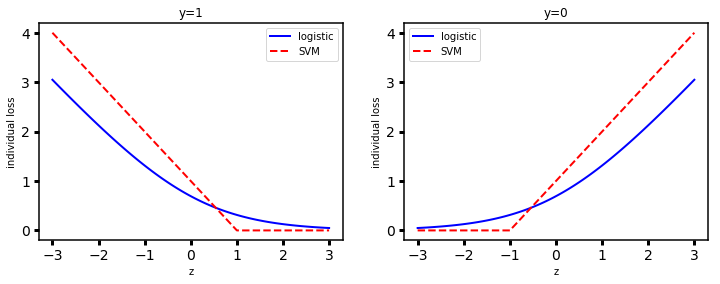

In [5]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')

ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')

ax[0].set_title('y=1')
ax[1].set_title('y=0')

ax[0].set_xlabel('z')
ax[1].set_xlabel('z')

ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()

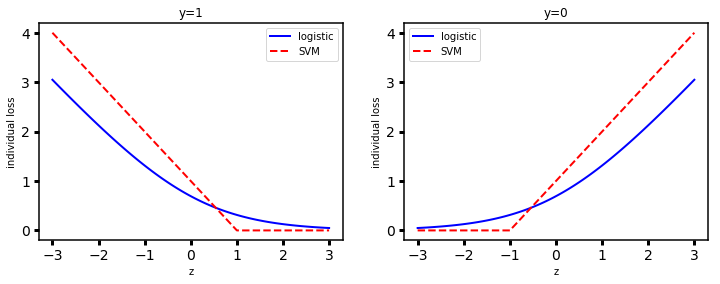

In [6]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')

ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')

ax[0].set_title('y=1')
ax[1].set_title('y=0')

ax[0].set_xlabel('z')
ax[1].set_xlabel('z')

ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()

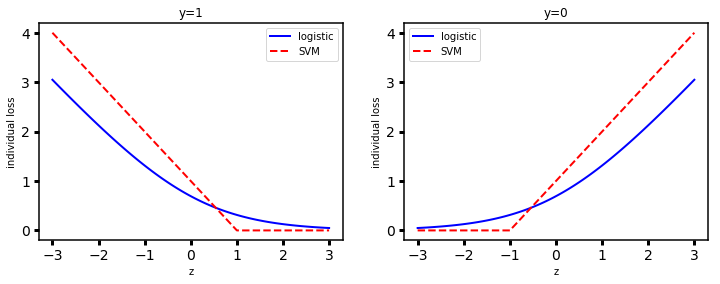

In [7]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
z = np.linspace(-3,3,num=100)
ax[0].plot(z,-np.log(sigmoid(z)),label='logistic',lw=2, color='b')
ax[1].plot(z,-np.log(1-sigmoid(z)),label='logistic',lw=2,color='b')

ax[0].plot(z,np.maximum(0,1-z),label='SVM',lw=2, color='r',linestyle='--')
ax[1].plot(z,np.maximum(0,1+z),label='SVM',lw=2,color='r',linestyle='--')

ax[0].set_title('y=1')
ax[1].set_title('y=0')

ax[0].set_xlabel('z')
ax[1].set_xlabel('z')

ax[0].set_ylabel('individual loss')
ax[1].set_ylabel('individual loss')
ax[0].legend()
ax[1].legend()
plt.show()

As you can see, in both logistic regression and SVM, small z is penalized if $y=1$, and large z is penalized if $y=0$. **What's different is that for SVM, if z < -1 for y=0 and z > 1 for y=1, the individual loss for this sample becomes 0. But when z>-1 for y=0 and z<1 for y=1, SVM tends to penalize more than logistic regression (i.e. red curve is above blue curve most of the time)**. We will talk about what this means soon, but right now let's write down the cost function for SVM:
<center>
$J(\theta)=\frac{1}{m}\sum^{m}_{i=1}[y^{(i)}(max(0, 1-\vec{\theta}^{T}\cdot\vec{x}^{(i)}))+(1-y^{(i)})(max(0, 1+\vec{\theta}^{T}\cdot\vec{x}^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$
</center>
We can safely remove the $\frac{1}{m}$ factor (i.e. it does not affect the minimization result), and re-organize the summand, which gives us:
<center>
$J(\theta)=\sum^{m}_{i=1}max(0, 1-t^{(i)}(\vec{\theta}^{T}\cdot\vec{x}^{(i)})) + \frac{\lambda}{2}\sum_{j=1}^{n}\theta_j^2$
</center>
where $t^{(i)}=1$ if $y^{(i)}=1$, and $t^{(i)}=-1$ if $y^{(i)}=0$. You can easily prove that the above two equations are equivalent. By convention, the regularization parameter $\lambda$ before the l2 penalty is usually repalced by a parameter $C$ in front of the loss function, and $\vec{\theta}^{T}\cdot\vec{x}^{(i)}=\theta_0+\theta_1 x_1 +...+\theta_n x_n$ is replaced by $\vec{w}^{T}\cdot\vec{x}^{(i)}+b=b + w_1 x_1 +...+w_n x_n$:
<center>
$J(\vec{w},b)=C\sum^{m}_{i=1}max(0, 1-t^{(i)}(\vec{w}^{T}\cdot\vec{x}^{(i)}+b)) + \frac{1}{2}\sum_{j=1}^{n}w_j^2$
</center>
Here, $C$ is equivalent to $1/\lambda$. Larger C (smaller $\lambda$) leads to lower bias but higher variance (possibly overfitting), whereas smaller C (larger $\lambda$) leads to higher bias but lower variance (possibly underfitting).<br/>
<br/>
The function
<center>
$l(\vec{w}^{T}\cdot\vec{x}^{(i)}+b)=max(0, 1-t^{(i)}(\vec{w}^{T}\cdot\vec{x}^{(i)}+b)) $
</center>
is called **hinge loss**.
The cost function $J(\vec{w},b)$ is therefore a hinge loss function with l2 penalty. It is used as the objective function for the so-called **soft margin SVM**.

**So, what exactly does SVM do? And what does "margin" refer to? Here is some intuition**: <br/>
Same as logistic regression, SVM's **decision boundary** is $\vec{w}^{T}\cdot\vec{x}^{(i)}+b=0$. SVM predicts
<center>
$\hat{y}=1$,  if $\vec{w}^{T}\cdot\vec{x}^{(i)}+b\geq0$ <br/>
$\hat{y}=0$,  if $\vec{w}^{T}\cdot\vec{x}^{(i)}+b<0$
</center>
What's different is that SVM also has the concept of "margins". The two **margins** are defined by:
<center>
$\vec{w}^{T}\cdot\vec{x}^{(i)}+b=1$ <br/>
$\vec{w}^{T}\cdot\vec{x}^{(i)}+b=-1$
</center>
The **hinge loss** penalizes the so-called **margin violations** - if $y=1$ samples cross the $\vec{w}^{T}\cdot\vec{x}+b=1$ margin ($\vec{w}^{T}\cdot\vec{x}+b<1$ ), hinge loss becomes nonzero and scale with how far away $\vec{w}^{T}\cdot\vec{x}+b$ is from 1. On the other hand, if $y=0$ samples cross the $\vec{w}^{T}\cdot\vec{x}+b=-1$ margin ($\vec{w}^{T}\cdot\vec{x}+b>-1$ ), hinge loss also becomes nonzero and scale with how far away $\vec{w}^{T}\cdot\vec{x}+b$ is from -1. <br/>
The regularization term $\frac{1}{2}\sum_{j=1}^{n}w_j^2$ plays the role of **widening the distance between the two margins ("street width")**. Imagine the simplest case where $\vec{w}=[w]$. Say we have $wx_0+b=0$, $wx_1+b=1$, and $wx_{-1}+b=-1$. Then 
<center>
   $x_1 - x_0 = 1/w$ <br/>
   $x_0 - x_{-1} = 1/w$
</center>
The smaller $w$ is, the larger the distance between the two margins: $x_1 - x_{-1}=2/w$. In general, the smaller $\Vert w \Vert_2^2 = \sum_{j=1}^{n}w_j^2$ is, the larger the distance between margins will be. This is also why SVM is sometimes called **"large margin classifier"**. 

Now, if the parameter $C$ is very large, margin violations will be heavily penalized. As $C$ approaches infinity, no margin violation will be tolerated. This is called **hard margin SVM**. The objective is:
<center>
    minimze $J(\vec{w},b)=\frac{1}{2}\sum_{j=1}^{n}w_j^2$ <br/>
    subject to $t^{(i)}(\vec{w}^T \cdot \vec{x}^{(i)}+b)\geq1$
</center>

Note that for hard margin SVM, as well as soft margin SVM with large $C$, the classifier is very sensitive to outliers. This is because the classifier tries too hard to make sure there is no margin violations. See the graphs below:
<img src="https://imgur.com/0X4TpzU.png" width="500px"/>
Dashed lines are margins. Solid lines are decision boundaries. <br/>
Now let's summarize the objective functions for SVM:

### Soft margin SVM
Soft margin SVM's cost function is hinge loss + regularization. **It balances the objective of widening the margin ($ \frac{1}{2}\sum_{j=1}^{n}w_j^2$), while limiting margin violations ($\sum^{m}_{i=1}max(0, 1-t^{(i)}(\vec{w}^{T}\cdot\vec{x}^{(i)}+b) $)**. Parameter $C$ controls the balance between the two objectives.
<center>
$J(\vec{w},b)=C\sum^{m}_{i=1}max(0, 1-t^{(i)}(\vec{w}^{T}\cdot\vec{x}^{(i)}+b)) + \frac{1}{2}\sum_{j=1}^{n}w_j^2$
</center>
The regularization is default to l2, but l1 is also a choice. Choice of l1 regularization will have feature selection effect (explained in [Machine Learning 2 Regularized LM, Early Stopping
](https://www.kaggle.com/fengdanye/machine-learning-2-regularized-lm-early-stopping))

### Hard margin SVM
The objective of hard margin SVM is:
<center>
    minimze $J(\vec{w},b)=\frac{1}{2}\sum_{j=1}^{n}w_j^2$ <br/>
    subject to $t^{(i)}(\vec{w}^T \cdot \vec{x}^{(i)}+b)\geq1$
</center>
It is equivalent to soft margin SVM with $C\to \infty$. Hard margin SVM is very sensitive to outliers.

### Example 4.1
In this example we will test SVM on the iris dataset. This dataset contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

In [8]:
from sklearn import datasets

In [9]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # we will only focus on Iris-setosa and Iris-Versicolor
data.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


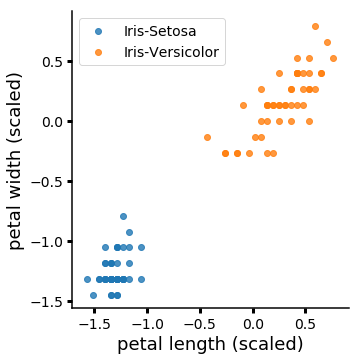

In [10]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [11]:
svc = LinearSVC(C=1,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [12]:
# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

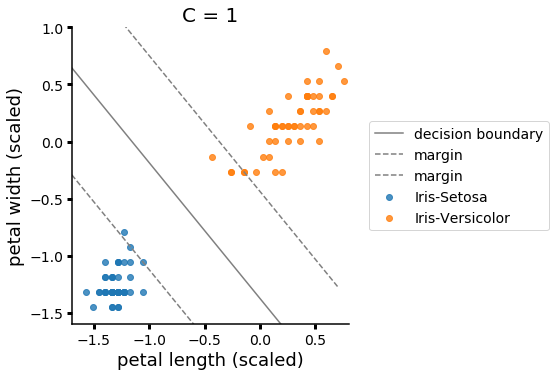

In [13]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('C = 1', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [14]:
svc = LinearSVC(C=1000,loss="hinge") # let's change C to a much larger value
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# get the parameters
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# decision boundary
x1_decision = -b/w1 - w0/w1*x0
# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin 
x1_minus = x1_decision - 1/w1

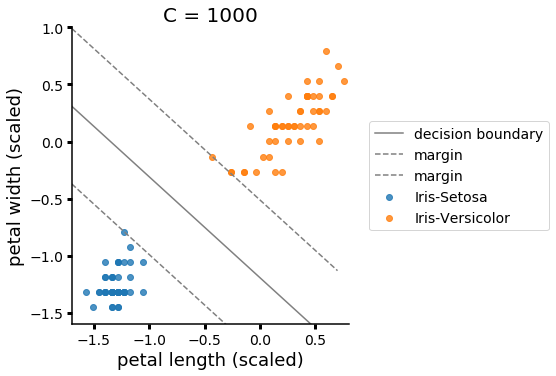

In [15]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['decision boundary','margin','margin','Iris-Setosa','Iris-Versicolor'], fontsize = 14, loc='center left', bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.title('C = 1000', fontsize = 20)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

As you can see, large C leads to heavy penalization of margin violations. **When C=1000, data points tend not to cross the margin and stay "off the street", whereas when C=1, a few data points have crossed the margin**.

## Non-linear SVM
SVM, at its original form, can only classify linearly separable variables. Yet it can be easily adapted to conduct complex nonlinear classifications by adding non-linear features. Here we will introduce two types of non-linear features: polynomial features, and similarity features.

### Polynomial features
Given a feature vector $[x_1, x_2,...,x_n]$ (bias not included), we can transform it to polynomial features, just like what we did in linear regression and logistic regression. For example, a 2nd degree polynomial transformation of $[x_1, x_2, x_3]$ through PolynomialFeatures(degree = 2, include_bias=False) will be $[x_1, x_2, x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3]$. A SVM classifier can be trained on these new features.  Instead of $w_1x_1+w_2x_2+w_3x_3+b$, we will have $w_1x_1+w_2x_2+w_3x_1^2+w_4x_2^2+w_5x_3^2+w_6x_1x_2+w_7x_1x_3+w_8x_2x_3+b$. Let's look at the following example:

### Example 4.2
This example uses the "make_moons" function in **Scikit-Learn** to generate a dataset, then runs SVM on polynomial features to classify the datapoints. 

In [16]:
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


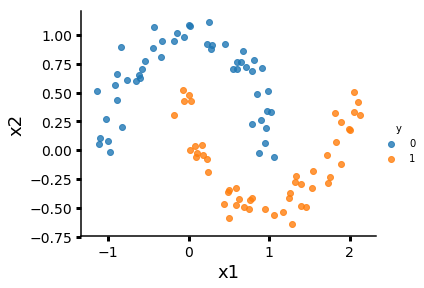

In [17]:
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

In [18]:
# tranform the features, here we use a 3rd degree polynomials
print('Shape of X before tranformation:', X.shape)
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xpoly = poly.fit_transform(X)
print('Shape of X aftere tranformation:', Xpoly.shape)

Shape of X before tranformation: (100, 2)
Shape of X aftere tranformation: (100, 9)


In [19]:
# standardize the data
scaler = StandardScaler()
Xpolystan = scaler.fit_transform(Xpoly)

In [20]:
svm_clf = LinearSVC(C=10,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)
print(svm_clf.intercept_, svm_clf.coef_)

[0.14736334] [[-1.4819898  -0.38933791 -3.63180113 -0.24404256  0.84163992  6.20773647
  -0.98200441  0.70832875 -1.94868929]]


In [21]:
# preparing to plot decision boundary of the classifier
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [22]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# polynomial transformation and standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridpoly = poly.transform(xgrid)
xgridpolystan = scaler.transform(xgridpoly)
# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

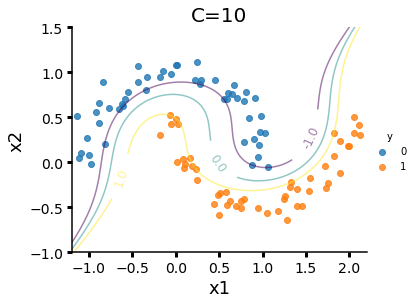

In [65]:
# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1, fmt='%1.1f', fontsize=12, 
           manual=[(1.5,0.3),(0.5,0.0),(-0.5,-0.2)])

plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

Overall, the classification seems to learn pretty well. There are some margin violations - some orange dots have gone pass the $\vec{w}^{T}\cdot\vec{x}^{(i)}+b=1$ margin, and some blue dots have gone pass the $\vec{w}^{T}\cdot\vec{x}^{(i)}+b=-1$ margin. But no point is on the wrong side of the decision boundary ($\vec{w}^{T}\cdot\vec{x}^{(i)}+b=0$). <br/>

Let's also try training SVM with a larger C: $C=1000$:

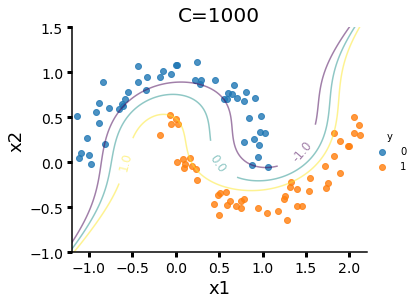

In [64]:
svm_clf = LinearSVC(C=1000,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)

# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1, fmt='%1.1f', fontsize=12, manual=[(1.5,0.1),(0.5,0.0),(-0.5,0.0)])
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

Now, we have no margin violations since the penalty is 100 times higher than the $C=10$ case. <br/>
When the degree of the polynomials is high, the above model can become really slow. Fortunately, there exists a mathematical technique called **"kernel trick"** that avoids the explicit mapping needed to get linear learning algorithms to learn a nonlinear function or decision boundary. The mathematical details of the kernel trick is beyond the scope of this tutorial. If you are interested, you can read this [Quora post](https://www.quora.com/What-is-the-kernel-trick). I read the kernel trick from the book "Hands-on Machine Learning with Scikit-Learn & TensorFlow" Chapter 5. If you have the book, you can read the book instead. <br/>
The kernel trick is implemented by the **SVC class in Scikit-Learn**. Let's run the SVC on the same dataset:

In [66]:
from sklearn.svm import SVC

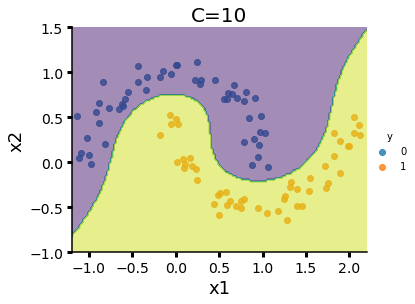

In [67]:
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=3, C=10, coef0=1)
svm_clf.fit(Xstan,y)

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

The parameter coef0 in SVC determines how much the high-degree polynomials affect prediction versus low-degree polynomials. The discussion delow is optional, and you don't have to understand it to proceed. <br/>
The coef0 is the $r$ in the polynomial kernal function
<center>
    $K(\vec{x},\vec{x}')=(\gamma \vec{x}^T \cdot \vec{x}' + r)^d$
</center>
where $d$ is the degree of the polynomials. When $r=0$, $\gamma \vec{x}^T \cdot \vec{x}' \geq 1$ and $\gamma \vec{x}^T \cdot \vec{x}' < 1$ will be separated when d is large. This means the $\gamma \vec{x}^T \cdot \vec{x}' < 1$ terms will vanish, while the $\gamma \vec{x}^T \cdot \vec{x}' \geq 1$ terms will approach infinity as $d \to \infty$. With a nonzero $r$, such distinction can be avoided. In cases where the polynomial degree $d$ is large, you might want to increase $r$ accordingly. For more on SVC, see http://scikit-learn.org/stable/modules/svm.html.

### Similarity features
Another way to construct non-linear SVM is to add new features by computing the similarity between each datapoint $\vec{x}$ to certain landmarks $\vec{l}$. A popular definition of the similarity function is the **Gaussian Radial Basis Function (RBF)**:
<center>
    $\phi_\gamma(\vec{x},\vec{l})=exp(-\gamma \Vert \vec{x}-\vec{l} \Vert^2)$
</center>
Where $\Vert \vec{x}-\vec{l} \Vert^2=(x_1-l_1)^2 + (x_2-l_2)^2 +...+(x_n-l_n)^2$. In case of a 1D input feature $x$ and a landmark $l=0$, we can plot the similarity function as follows:

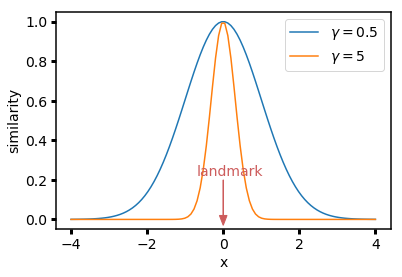

In [68]:
x = np.linspace(-4,4,num=100)
l = 0
gamma1=0.5
f1 = np.exp(-gamma1*(x-l)*(x-l))
gamma2=5
f2 = np.exp(-gamma2*(x-l)*(x-l))
plt.plot(x,f1,label=r'$\gamma = 0.5$')
plt.plot(x,f2,label=r'$\gamma = 5$')
plt.legend(fontsize = 14)
plt.xlabel('x',fontsize = 14)
plt.ylabel('similarity', fontsize = 14)
plt.arrow(0,0.2,0,-0.18, head_width=0.2, head_length=0.05,lw=1,color='indianred')
plt.text(-0.7,0.22,'landmark', color='indianred', fontsize=14)
plt.show()

Somel key observations about the similarity function:
* similarity ranges from 0 to 1. When $\vec{x}$ is right on top of $\vec{l}$, similarity equals 1. The farther $\vec{x}$ is from $\vec{l}$, the smaller the similarity.
* $\gamma$ controls the range of influence of the landmark $\vec{l}$. Big $\gamma$ corresponds to small range of influence, as similarity quickly vanishes as $\Vert \vec{x}-\vec{l} \Vert^2$ increases. Small $\gamma$ corresponds to large range of influence. <br/>

Now, how do we choose landmarks? <br/>
A common practice is to **create a landmark at the location of each of the input samples $\vec{x}^{(i)}$**. That is:
<center>
    $\vec{l}^{(1)}=\vec{x}^{(1)},\vec{l}^{(2)}=\vec{x}^{(2)},...,\vec{l}^{(m)}=\vec{x}^{(m)}$
</center>
Then, each sample $\vec{x}^{(i)}$ will be tranformed in the following way:
<center>
    $f_1^{(i)}=\phi_\gamma(\vec{x}^{(i)}, \vec{l}^{(1)})$ <br/>
    $f_2^{(i)}=\phi_\gamma(\vec{x}^{(i)}, \vec{l}^{(2)})$ <br/>
    ... <br/>
    $f_m^{(i)}=\phi_\gamma(\vec{x}^{(i)}, \vec{l}^{(m)})$ <br/>
</center>
Where$f_j^{(i)}$ is the similarity between sample $\vec{x}^{(i)}$ and landmark $\vec{l}^{(j)}$. Let's define
<center>
    $\vec{f}^{(i)}=[f_1^{(i)}, f_2^{(i)},...,f_m^{(i)}]^T$
</center>
Then instead of $\vec{w}_x^T \cdot \vec{x}^{(i)}+b$, we have $\vec{w}_f^T \cdot \vec{f}^{(i)}+b$. Let's look at the following example:

### Example 4.3
This example runs SVM on Gaussian RBF similarity features using the make_moons dataset.

In [69]:
# generate dataset
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


In [70]:
# standardize the data so that x1, x2 have similar scale. 
# Otherwise, if x2>>x1, x2 will dominate the change in similarity.
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [71]:
from sklearn.metrics.pairwise import rbf_kernel

In [72]:
# compute similarity features. F.shape should be (100,100)
F = rbf_kernel(Xstan, gamma = 0.5)

svm_clf = LinearSVC(C=1000,loss='hinge',max_iter=10000)
svm_clf.fit(F,y)

LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [73]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1,h=0.1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)
f = rbf_kernel(xgridstan, Xstan, gamma = 0.5)
# prediction
Z = f.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wf + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

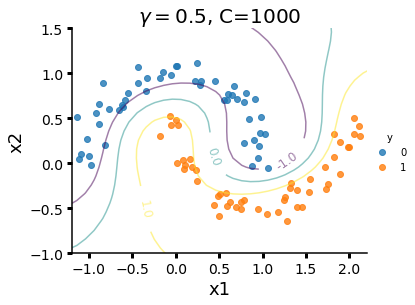

In [75]:
# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1, fmt='%1.1f', fontsize=12, manual=[(1.3,0),(0.5,0.1),(-0.3,-0.5)])
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=0.5$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

The model learned well from the similarity features. $C=1000$ limited the margin violations. Let's try a larger $\gamma$ value and see what the prediction looks like:

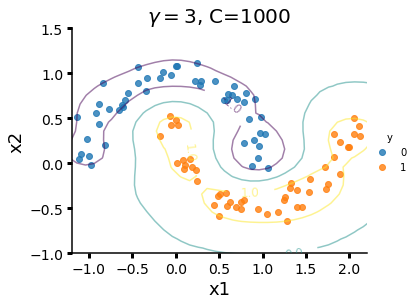

In [76]:
# compute similarity features. F.shape should be (100,100)
F = rbf_kernel(Xstan, gamma = 3)

svm_clf = LinearSVC(C=1000,loss='hinge',max_iter=10000)
svm_clf.fit(F,y)

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1,h=0.1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)
f = rbf_kernel(xgridstan, Xstan, gamma = 3)
# prediction
Z = f.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wf + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1, fmt='%1.1f', fontsize=12)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=3$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

As you can see, **a larger $\gamma$ leads to a more irregular decision boundary (cyan curve), and more irregular margins (purple and yellow curves)**. This is because larger $\gamma$ means smaller range of influence of each landmark. Such localization leads to less smooth boundaries. If $\gamma$ is too large,  the model will overfit to each landmark and you will need to decrease $\gamma$ to regularize the model a bit. <br/>
Let's also plot $\gamma = 3, C=0.05$, just to see what it looks like:

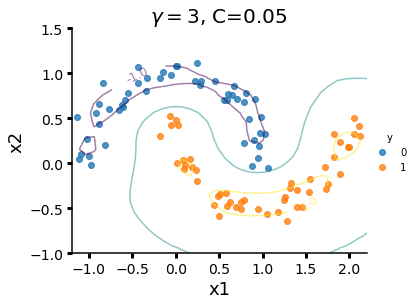

In [78]:
# compute similarity features. F.shape should be (100,100)
F = rbf_kernel(Xstan, gamma = 3)

svm_clf = LinearSVC(C=0.05,loss='hinge',max_iter=10000)
svm_clf.fit(F,y)

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1,h=0.1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)
f = rbf_kernel(xgridstan, Xstan, gamma = 3)
# prediction
Z = f.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wf + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
CS=plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1,0,1])
plt.clabel(CS, inline=1,fmt='%1.1f', fontsize=12)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=3$, C=0.05', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

There are more margin violations, which is expected. <br/>
**We can also use SVC with RBF kernel to do the same classification**. Here is how:

In [36]:
svm_clf = SVC(kernel='rbf', gamma = 3, C=1000)
svm_clf.fit(Xstan,y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

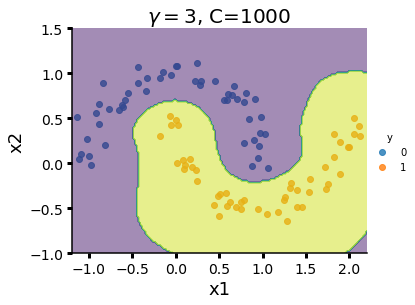

In [37]:
# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=3$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

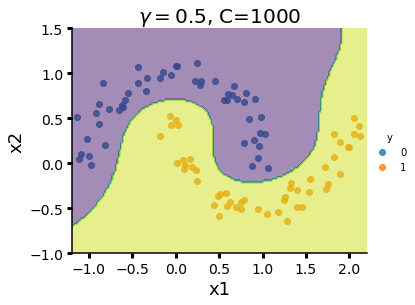

In [38]:
svm_clf = SVC(kernel='rbf', gamma = 0.5, C=1000)
svm_clf.fit(Xstan,y)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, size=4, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title(r'$\gamma=0.5$, C=1000', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

## Other applications of SVM
Aside from classification, the SVM algorithm is also capabale of regression and outlier detection. **SVM regression** aims to fit as many datapoints as possible *between* the margins while limiting margin violations (datapoints off the "street"). Related Scikit-Learn functions are: [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html), and [linearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html). **SVM outlier detection** detects a soft boundary on input data X and predict inliers (class 1) and outliers (class -1) on the same data. Related Scikit-Learn function is [OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html). I will not go into details of these applications, but feel free to learn more about them yourself!

# SVM with Bank Marking dataset
Now let's get our hands dirty (dirtier :)) with the UCI Bank Marketing dataset. I will include the citation for the dataset here: <br/>
> [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Let's take a look at the data:

In [79]:
data = pd.read_csv('bank-additional-full.csv',sep=';') # note that the delimiter for this dataset is ";"
data = data.drop('duration',axis=1) # as recommended by the dataset description, we will drop the last contact duration values.
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Dealing with mixed variable types
Note that this dataset has both numeric and categorical variables, which is very common for real-world datasets. There are some level of concensus regarding how to deal with such situation, yet the solutions vary depending on the purpose of the analysis, as well as the person conducting the analysis. Below I describe how I process the data.<br/>

Variable description can be found here: https://www.kaggle.com/henriqueyamahata/bank-marketing/home

### Numeric variables
These are the easiest to deal with. Variables that fall in this category are:
* Age
* Campaign
* Pdays
* Previous
* Emp.var.rate
* Cons.price.idx
* Cons.conf.idx
* Euribor3m
* Nr.employed

Let's take a look at the distribution of these variables:

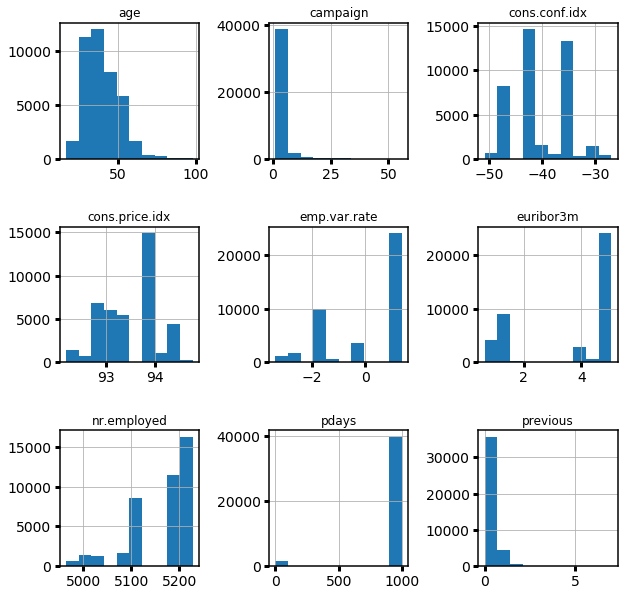

In [80]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

You will want to inspect if there are outliers/typos in the data. For example, if someone has an age of 200, you probably will want to remove it. Here everything seems reasonable. The pdays=999 looks like an outlier, but it actually means "client was not previously contacted", and should be included. <br/>
Before we train our SVM model, we will have to standardize the numeric data. But not right now. Let's move on to the categorical variables.

### Categorical variables
Categorical variables are more tricky. It depends on whether the variable is ordinal or nominal. An ordinal variable is something like ["extremely agree", "agree", "neutral", "disagree", "extremely disagree"]. That is, there exists a sense of ordering in the variable. A nominal variable does not have ordering in it, e.g. ["blue", "yellow", "green"]. Let's start with ordinal variables.
#### Ordinal variables
First, I personally think the variable "poutcome" (outcome of the previous marketing campaign - 'failure', 'nonexistent', 'success') is ordinal. **This is based on the assumption that  "success" is better than "failure", and that "nonexistent" is somewhere in between**. I will therefore assign failure=-1, nonexistent=0, and success=1.

In [81]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})

Further, I think "default" (has credit in default -  'no', 'yes', 'unknown') can be an ordinal variable, **if we assume 'yes' is worse than 'no', and 'unknown' is somewhere in between**. And I can assume the same for variables "housing" (has housing loan - 'no', 'yes', 'unknown') and "loan" (has personal loan -'no', 'yes', 'unknown'). 

In [82]:
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

The variable "education" ( 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown') seems to be ordered, but I choose to define it as nominal, because I am not sure what the definition of "professional.course" is and how that compares to other categories such as "high.school" and "university.degree".

#### Nominal variables
All other categorical variables except "poutcome", "default", "housing" and "loan" are considered nominal. We will use **one-hot encoding** on these variables. For example, we have marital = ['divorced', 'married', 'single', 'unknown']. The one-hot representation for each of the categories will be:
<center>
    $divorced = [1,0,0,0]$ <br/>
    $married = [0,1,0,0]$<br/>
    $single = [0,0,1,0]$<br/>
   $unknown = [0,0,0,1]$<br/>
</center>
In python, **pandas** has a function **get_dummies** to do exactly this.

In [83]:
nominal = ['job','marital','education','contact','month','day_of_week']
dataProcessed = pd.get_dummies(data,columns=nominal)

Finally, we need to **map y from yes/no to 1/0**.

In [84]:
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
1,57,0,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
2,37,1,-1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
3,40,1,1,1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0
4,56,1,1,-1,1,999,0,0,1.1,93.994,...,0,1,0,0,0,0,1,0,0,0


## Train, test split and model selection
Next, we will split the processed dataset into a training set and a test set. **The training set will be where we conduct cross validation (CV) for model selection, whereas the test set is unaccessbible during model selection and serves as a final step to evaluate model performance**. 

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# raw data
X = dataProcessed.drop('y', axis=1).values
y = dataProcessed['y'].values
# split, random_state is used for repeatable results, you should remove it if you are running your own code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (28831, 54)
y train size:  (28831,)
X test size:  (12357, 54)
y test size:  (12357,)


Before the training starts, standardize the *numeric* variables in the training set:

In [87]:
# column index of numeric variables
idx_numeric=[0,4,5,6,8,9,10,11,12]
##print(dataProcessed.columns[idx])

# standardize numeric variables only
scaler = StandardScaler()
X_train[:,idx_numeric]=scaler.fit_transform(X_train[:,idx_numeric])
X_test[:,idx_numeric]=scaler.transform(X_test[:,idx_numeric])

Note that since we are doing cross-validation, the $X_{train}$ and $y_{train}$ will be further split into subparts, and SVM is trained only on a subpart of (X_train, y_train). You can choose to standardize the subpart where the training actually takes place, but this means with a k-fold cross-validation, you will have to standardize k times. The fact that we only want to standardize the numeric variables further complicates the processing pipeline, but if you are really interested in doing it, you should look up sklearn functions like Pipeline, make_pipeline, FeatureUnion, etc. <br/>
For now, I choose to simply normalize the whole $(X_{train}, y_{train})$ dataset. <br/>

We will use Scikit-Learn's **GridSearchCV** function to conduct model selection. **This function iterates through all possible combinations of hyperparameters (e.g. kernel, gamma, C) and runs cross-validation on each combination (i.e. model). The the best model is the one that produces the highest score during cross validation. Note that during cross-validation GridSearchCV will split $(X_{train}, y_{train})$ further into train and test set. Once the best model is found, GridSearchCV train the best model on the whole train data $(X_{train}, y_{train})$, and it is this trained best model that will be used for further prediction**.<br/>
The score of interest is chosen by the user and some of the popular scores are: accuracy, recall, and precision. Here we will use [precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html).

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1],
                     'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='precision')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]}, {'kernel': ['linear'], 'C': [1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

This training will take some time. After it finishes, we can print out the **detailed cross validation results**:

In [90]:
print(clf.cv_results_)

{'mean_fit_time': array([ 66.79962711, 200.34795542]), 'std_fit_time': array([ 9.52147885, 18.72376423]), 'mean_score_time': array([3.32091889, 2.68632369]), 'std_score_time': array([0.24399211, 0.02316636]), 'param_C': masked_array(data=[1, 1],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1, --],
             mask=[False,  True],
       fill_value='?',
            dtype=object), 'param_kernel': masked_array(data=['rbf', 'linear'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}], 'split0_test_score': array([0.66044776, 0.64186047]), 'split1_test_score': array([0.64081633, 0.61320755]), 'split2_test_score': array([0.66396761, 0.64878049]), 'split3_test_score': array([0.68325792, 0.65128205]), 'split4_test_score': array([0.69731801, 0.67924528]), 'mean_test_score': array([0.66916122, 0.64687499]), 

Since we set cv=5, GridSearchCV conducted a 5-fold cross-validation. For each fold there is a "test score", which in our case is the precision of prediction on the hold-out set for that fold. You can find these test scores in **'split0_test_score', 'split1_test_score',...,'split4_test_score'**. There are two values in each score vector, because we tested two models:  {kernel=rbf, gamma=0.1, C=1} and {kernel=linear, C=1}. The average of the five test scores is recorded in **'mean_test_score'**, and standard deviation in **'std_test_score'**. The **'mean_test_score'** is used to select the best model. Let's see in our case which model works better:


In [91]:
print('The best model is: ', clf.best_params_)
print('This model produces a mean cross-validated score (precision) of', clf.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.6691612228191874


For this tutorial I only selected between two models: {kernel=rbf, gamma=0.1, C=1} and {kernel=linear, C=1} since the training is taking quite long. If you wanna test more models, you can do something like:
> tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 1],
>                      'C': [1, 10, 100, 1000]},
>                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

GridSearchCV will then test all possible combinations of hyperparamters given in tuned_parameters. Be aware, though, that the function may take a very long time to finish. You can also refer to this example given by sklearn documentation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py.

## Final performance
Now that we have the best model, let's see how it performs on the evaluation set $(X_{test}, y_{test})$:

In [92]:
from sklearn.metrics import precision_score, accuracy_score

In [93]:
y_true, y_pred = y_test, clf.predict(X_test)
print('precision on the evaluation set: ', precision_score(y_true, y_pred))
print('accuracy on the evaluation set: ', accuracy_score(y_true, y_pred))

precision on the evaluation set:  0.647834274952919
accuracy on the evaluation set:  0.9002994254268836


The prediction accuracy on the evaluation set is 90.0%, which is pretty good given that we did not select models based on accuracy. The prediction precision is 64.8%, which means among all clients that are predicited to subscribe a term deposit, 64.8% will acutally do so . This precision score is very close to the model's mean cross-validated precision score on $(X_{train}, y_{train})$, which is a good sign that the model is not overfitting. <br/>
There are definitely space to improve prediction precision. Some ideas include:
* Include more models into GridSearchCV (e.g. different gamma and C values for SVC, or even classifiers other than SVM)
* Change data processing pipeline (e.g. treat variables as nominal instead of ordinal, standardardization on each CV fold)
* Change train-test ratio

This is the end of the tutorial. I hope you enjoyed it! 
For my previous tutorials, please see: <br/>
[Machine Learning 1 - Regression, Gradient Descent](https://www.kaggle.com/fengdanye/machine-learning-1-regression-gradient-descent#) <br/>
[Machine Learning 2 Regularized LM, Early Stopping](https://www.kaggle.com/fengdanye/machine-learning-2-regularized-lm-early-stopping#) <br/>
[Machine Learning 3 Logistic and Softmax Regression](https://www.kaggle.com/fengdanye/machine-learning-3-logistic-and-softmax-regression#)